In [ ]:
import pandas as pd

trip_data_file = "data/trip_data_4.csv"
trip_fare_file = "data/trip_fare_4.csv"

trips = pd.read_csv(trip_data_file, nrows=100)
fares = pd.read_csv(trip_fare_file, nrows=100)

Merge the Trip and Fare data together 

In [17]:
full_tripdata = pd.merge(left=trips,right=fares, how='left', left_on=['medallion',' hack_license',' vendor_id'], right_on=['medallion',' hack_license',' vendor_id'])
full_tripdata.columns
full_tripdata.head(2)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime_x,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,dropoff_longitude,dropoff_latitude,pickup_datetime_y,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,1,N,2013-04-04 18:47:45,2013-04-04 19:00:25,1,759,2.5,...,-73.976273,40.785648,2013-04-04 18:47:45,CRD,11.0,1.0,0.5,2.5,0.0,15.0
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,1,N,2013-04-05 07:08:34,2013-04-05 07:17:34,1,540,1.6,...,0.000000,0.000000,2013-04-05 07:08:34,CRD,8.5,0.0,0.5,1.8,0.0,10.8


In [23]:
full_tripdata.columns

Index([u'medallion', u' hack_license', u' vendor_id', u' rate_code',
       u' store_and_fwd_flag', u' pickup_datetime_x', u' dropoff_datetime',
       u' passenger_count', u' trip_time_in_secs', u' trip_distance',
       u' pickup_longitude', u' pickup_latitude', u' dropoff_longitude',
       u' dropoff_latitude', u' pickup_datetime_y', u' payment_type',
       u' fare_amount', u' surcharge', u' mta_tax', u' tip_amount',
       u' tolls_amount', u' total_amount'],
      dtype='object')

In [72]:
#numberofpassanagers = full_tripdata.groupby(' passenger_count').agg(['count']).reset_index()
numberofpassanagers = full_tripdata.iloc[:,7].astype("category")
numberofpassanagers.plot.hist()
print numberofpassanagers.describe()
numberofpassanagers.head()
#numberofpassanagers["passenger_count"].astype("category")
#numberofpassanagers.dtypes
print numberofpassanagers.value_counts()

TypeError: Empty 'DataFrame': no numeric data to plot

# What is the distribution of number of passengers per trip?

col_0             Frequency Probability
 passenger_count                       
1                              0.854545
2                              0.100000
3                              0.036364
4                              0.009091


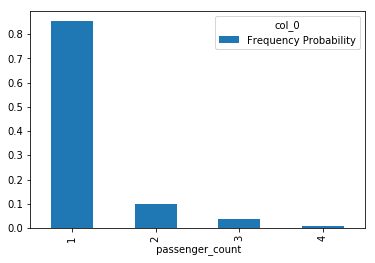

In [85]:
passengers = pd.crosstab(index=full_tripdata[" passenger_count"].astype("category"),columns="Frequency Probability",normalize='columns')
print passengers
passengers.plot.bar()

# b. What is the distribution of payment_type?

In [49]:
from scipy.stats import norm
print norm.cdf(numberofpassanagers,mean,std)

NameError: name 'mean' is not defined

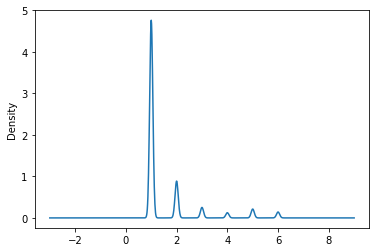

In [10]:
numberofpassanagers.plot.density()

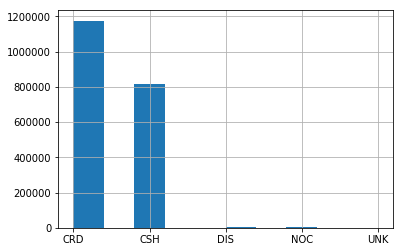

In [12]:
payment_types = fares.iloc[:,4]

payment_types.hist()

In [ ]:
payment_types.sum()

In [ ]:
print payment_types